# Imports

In [16]:
%pip install mediapipe opencv-python
!pip install scikit-learn
!pip install seaborn
!pip install flaml
!pip install lightgbm
!pip install joblib
!pip install pandas
!pip install matplotlib
!pip install numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from flaml import AutoML
from sklearn.datasets import load_iris
import joblib


        

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


# Read Training Data

In [17]:
path = r'C:\Users\henri\Documents\FingerCounterData\DatasetForFingerCounter'
training_path = path + r'\training_landmarks.csv'
training_path
# Write the DataFrame to a CSV file
df = pd.read_csv(training_path)

In [18]:
X_train = df[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_train = df['filename']
y_train = y_train.map(lambda image: image.split('_')[2])
X_train.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.475704,0.618786,9.811158e-07,0.479171,0.676307,-0.068816,0.486418,0.723549,-0.113471,0.484434,...,-0.050218,0.619755,0.521506,-0.067545,0.647437,0.503105,-0.080805,0.673448,0.490987,-0.091382
1,0.537752,0.787452,6.181712e-07,0.541429,0.714240,0.010108,0.535743,0.657173,0.008893,0.528629,...,-0.029821,0.351435,0.829174,-0.049971,0.317871,0.852092,-0.063870,0.287592,0.865897,-0.070944
2,0.527185,0.675401,1.024003e-06,0.517319,0.735375,-0.056100,0.509863,0.785461,-0.097479,0.496492,...,-0.054030,0.674093,0.644091,-0.072480,0.703382,0.638901,-0.083417,0.731246,0.638665,-0.090553
3,0.525047,0.652205,-1.952882e-07,0.481515,0.658926,-0.023100,0.441024,0.685282,-0.037133,0.406550,...,-0.057715,0.607231,0.711297,-0.074118,0.630953,0.735883,-0.076884,0.650610,0.762349,-0.081026
4,0.499612,0.600143,1.886958e-07,0.467016,0.626698,-0.031198,0.436816,0.659964,-0.052135,0.403419,...,-0.048940,0.592000,0.665131,-0.062797,0.609555,0.683005,-0.066744,0.625488,0.698632,-0.070502


# Read Validation Data

In [19]:
training_path = path + r'\validation_landmarks.csv'
# Write the DataFrame to a CSV file
df = pd.read_csv(training_path)

In [20]:
X_val = df[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_val = df['filename']
y_val = y_val.map(lambda image: image.split('_')[2])
X_val.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.424938,0.747210,3.969675e-07,0.408833,0.693837,0.004544,0.401896,0.644301,-0.001519,0.387213,...,-0.056885,0.568545,0.670895,-0.074861,0.601265,0.669721,-0.084871,0.626967,0.665460,-0.090870
1,0.436098,0.649468,5.775907e-07,0.421060,0.667005,-0.053530,0.408444,0.685788,-0.097750,0.416829,...,-0.085932,0.533842,0.590023,-0.111396,0.568258,0.600478,-0.121012,0.602388,0.611392,-0.126920
2,0.452503,0.694372,9.970689e-07,0.513345,0.746059,-0.049644,0.579844,0.787838,-0.082954,0.627969,...,-0.064897,0.537820,0.412581,-0.089943,0.549476,0.363218,-0.103511,0.568484,0.318638,-0.112079
3,0.482730,0.634917,1.911106e-07,0.529030,0.596542,-0.022270,0.561631,0.544044,-0.034478,0.592422,...,-0.043403,0.376302,0.516904,-0.061943,0.346921,0.508284,-0.074183,0.322458,0.498112,-0.082960
4,0.468378,0.673269,4.351499e-07,0.515781,0.653745,-0.026275,0.565885,0.626550,-0.046800,0.610504,...,-0.026776,0.404313,0.488467,-0.036692,0.382986,0.466024,-0.037964,0.368307,0.442225,-0.035899


# Read Test Data

In [21]:
training_path = path + r'\test_landmarks.csv'
# Write the DataFrame to a CSV file
df = pd.read_csv(training_path)

In [22]:
X_test = df[['x0','y0','z0','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4','x5','y5','z5','x6','y6','z6','x7','y7','z7','x8','y8','z8','x9','y9','z9','x10','y10','z10','x11','y11','z11','x12','y12','z12','x13','y13','z13','x14','y14','z14','x15','y15','z15','x16','y16','z16','x17','y17','z17','x18','y18','z18','x19','y19','z19','x20','y20','z20']]
y_test = df['filename']
y_test = y_test.map(lambda image: image.split('_')[2])
X_test.head()   

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,0.421465,0.586105,1.037641e-06,0.497743,0.567397,-0.050798,0.571116,0.532847,-0.080025,0.642661,...,-0.050605,0.349186,0.270440,-0.073050,0.333214,0.221005,-0.087568,0.325746,0.171373,-0.097242
1,0.427505,0.837924,3.724072e-07,0.405760,0.786386,-0.006279,0.389376,0.738977,-0.019959,0.367055,...,-0.055711,0.562480,0.710606,-0.071857,0.587116,0.684749,-0.082608,0.606356,0.658726,-0.090322
2,0.422878,0.806250,2.247678e-07,0.455893,0.758362,0.029231,0.481202,0.739530,0.033458,0.492843,...,-0.046106,0.551697,0.932747,-0.052137,0.557198,0.970018,-0.052243,0.561295,0.996424,-0.051815
3,0.470318,0.620140,4.749840e-07,0.526184,0.592817,-0.016215,0.567560,0.555162,-0.022132,0.608662,...,-0.002768,0.385817,0.475665,-0.009263,0.361884,0.455963,-0.012231,0.345377,0.439248,-0.011418
4,0.456835,0.659211,2.748110e-07,0.497659,0.672792,-0.029223,0.549525,0.674183,-0.048169,0.589394,...,-0.028356,0.468342,0.461507,-0.034787,0.461647,0.435053,-0.039271,0.459830,0.406920,-0.044480


# AutoML

In [23]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 300,  # in seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "iris.log",
    "seed": 7654321,
    "estimator_list": ['lgbm']

}
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val,
           **automl_settings)
# Predict
print(automl.predict_proba(X_train))
# Print the best model
print(automl.model.estimator)



[flaml.automl.logger: 01-22 20:23:20] {1679} INFO - task = classification
[flaml.automl.logger: 01-22 20:23:20] {1687} INFO - Data split method: stratified
[flaml.automl.logger: 01-22 20:23:20] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 01-22 20:23:20] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 01-22 20:23:20] {1900} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl.logger: 01-22 20:23:20] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-22 20:23:20] {2345} INFO - Estimated sufficient time budget=648s. Estimated necessary time budget=1s.
[flaml.automl.logger: 01-22 20:23:20] {2397} INFO -  at 0.1s,	estimator lgbm's best error=0.4706,	best estimator lgbm's best error=0.4706
[flaml.automl.logger: 01-22 20:23:20] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-22 20:23:20] {2397} INFO -  at 0.2s,	estimator lgbm's best error=0.4363,	best estimator lgbm's best error=0.4363
[flaml

# Store model to file

In [24]:
joblib.dump(automl.model, 'flaml_model.joblib')

['flaml_model.joblib']

In [25]:

print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Test set score: {:.4f}'.format(automl.score(X_test, y_test)))

Best hyperparmeter config: {'n_estimators': 1583, 'num_leaves': 5, 'min_child_samples': 10, 'learning_rate': 0.12798603502631675, 'log_max_bin': 10, 'colsample_bytree': 0.5363663798153918, 'reg_alpha': 0.006028571102229813, 'reg_lambda': 0.029945890528455244}
Best accuracy on validation data: 0.9412
Test set score: 0.8878


# Standard lightGBM

In [87]:
clf = lgb.LGBMClassifier(verbose=-1)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Validation set score: {:.4f}'.format(clf.score(X_val, y_val)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))


Training set score: 1.0000
Validation set score: 0.9216
Test set score: 0.8829


# Confusion Matrix

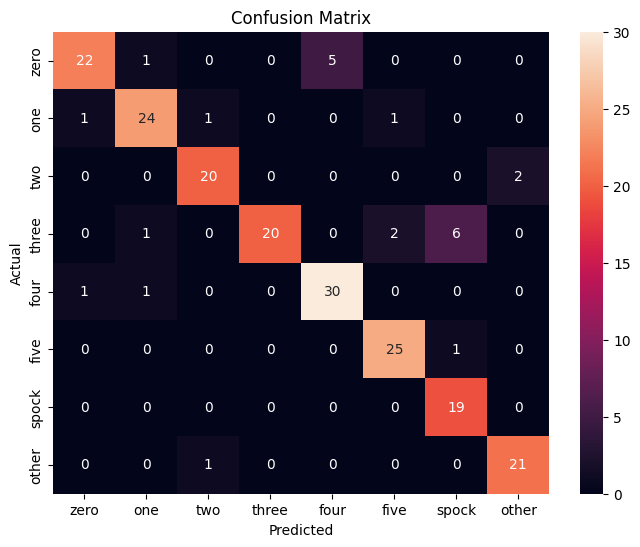

In [88]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

predictions = clf.predict(X_test)

class_names = ["zero", "one", "two", "three", "four", "five", "spock","other"]
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Load Model From File

In [26]:
loaded_model = joblib.load("C:/Users/henri/Documents/FingerCounter/fingerCounter/LightGBMFingerCounter/flaml_model.joblib")
loaded_model.fit(X_train, y_train)
predictions = loaded_model.predict(X_test)
print('Test set score: {:.4f}'.format(loaded_model.score(X_test, y_test)))

Test set score: 0.8878


# Single picture test

In [57]:
import cv2
import mediapipe as mp

# Initialisieren von MediaPipe und Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5)

# Pfad zum Bild auf Ihrer Festplatte
image_path = "C:/Users/henri/Documents/fingerCounterData/DatasetForFingerCounter/Test/Alex_Image_four_2.jpg" #add your path

# Bild einlesen
image = cv2.imread(image_path)

# BGR 2 RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detections
with hands:
    results = hands.process(image_rgb)
    
# Extrahieren der Koordinaten der Handlandmarken
landmark_coords = {}
if results.multi_hand_landmarks:
    for i, landmark in enumerate(results.multi_hand_landmarks[0].landmark):
        landmark_coords[f'x{i+1}'] = landmark.x
        landmark_coords[f'y{i+1}'] = landmark.y
        landmark_coords[f'z{i+1}'] = landmark.z

    # Ausgabe der Koordinaten


    # Erstellen eines Pandas DataFrame aus dem Dictionary
    df = pd.DataFrame([landmark_coords])

    y_pred=clf.predict(df)
    print(y_pred)
else:
    print('no hand detected')


['four']


# Live demo

In [89]:

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
cap = cv2.VideoCapture(0)


with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        landmark_coords = {}
        if results.multi_hand_landmarks:
            for i, landmark in enumerate(results.multi_hand_landmarks[0].landmark):
                landmark_coords[f'x{i+1}'] = landmark.x
                landmark_coords[f'y{i+1}'] = landmark.y
                landmark_coords[f'z{i+1}'] = landmark.z
                # Erstellen eines Pandas DataFrame aus dem Dictionary
            df = pd.DataFrame([landmark_coords])
            y_pred = clf.predict(df)
            print(y_pred)
            
            # font 
            font = cv2.FONT_HERSHEY_SIMPLEX 
            
            # org 
            org = (00, 185) 
            
            # fontScale 
            fontScale = 1
            
            # Red color in BGR 
            color = (0, 0, 255) 
            
            # Line thickness of 2 px 
            thickness = 2
            
            # Using cv2.putText() method 
            image = cv2.putText(image, y_pred[0], org, font, fontScale,  
                            color, thickness, cv2.LINE_AA, False)
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
        
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti